In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'E:\gitlab\yyzh\bx\data_r6\KG28FA29EC.csv')

In [4]:
sales=pd.Series(df.groupby('month_r')['PC'].sum())

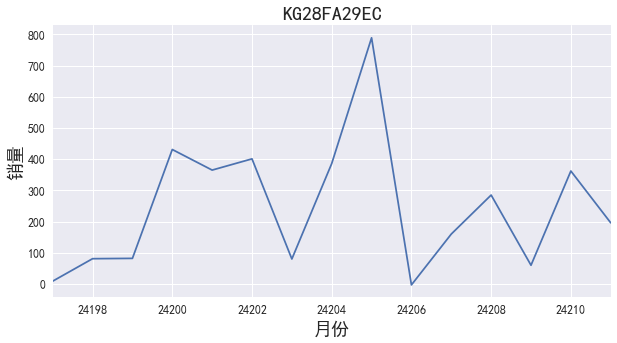

In [5]:
plt.rc('font', family='SimHei', size=13)
sales.plot(kind='line',figsize=(10,5))
plt.ylabel('销量',fontsize=18)
plt.xlabel('月份',fontsize=18)
plt.title('KG28FA29EC',fontsize=20)
plt.tick_params(labelsize=12,axis='both')

In [6]:
sales

month_r
24197      9
24198     81
24199     82
24200    431
24201    365
24202    401
24203     80
24204    386
24205    789
24206     -3
24207    160
24208    285
24209     60
24210    362
24211    196
Name: PC, dtype: int64

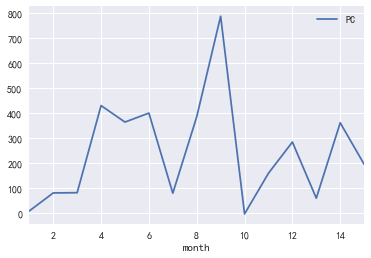

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_excel(r'C:\Users\dell\Desktop\BX\tmp\KG28FA29EC_1.xlsx',index_col = 'month')
forecastnum = 2
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
data.plot()
plt.show()

d:\develop\anaconda\envs\python35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


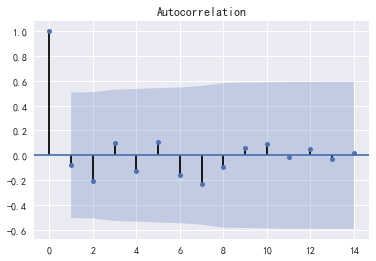

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()

In [10]:
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(data['PC']))

原始序列的ADF检验结果为： (-0.0, 0.95853208606005602, 8, 6, {'10%': -2.901197777777778, '5%': -3.6462381481481483, '1%': -5.3542564814814817}, -315.87771825477137)


d:\develop\anaconda\envs\python35\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


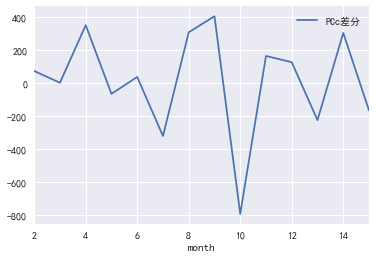

d:\develop\anaconda\envs\python35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


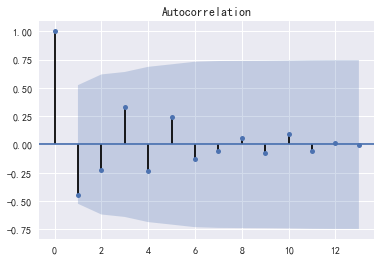

In [11]:
#差分后的结果
D_data = data.diff().dropna()
D_data.columns = [u'PCc差分']
D_data.plot() #时序图
plt.show()
plot_acf(D_data).show() #自相关图

差分序列的ADF检验结果为： (-0.0, 0.95853208606005602, 8, 5, {'10%': -2.9868100000000002, '5%': -3.9292800000000003, '1%': -6.0451139999999999}, -262.42654503280971)


d:\develop\anaconda\envs\python35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
d:\develop\anaconda\envs\python35\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


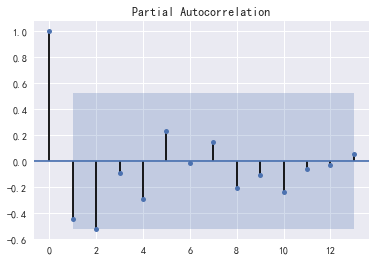

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show() #偏自相关图
print(u'差分序列的ADF检验结果为：', ADF(D_data[u'PCc差分'])) #平稳性检测

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_data, lags=1)) #返回统计量和p值

差分序列的白噪声检验结果为： (array([ 3.39480099]), array([ 0.06540226]))


In [15]:
from statsmodels.tsa.arima_model import ARIMA

data[u'PC'] = data[u'PC'].astype(float)
#定阶
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    try: #存在部分报错，所以用try来跳过报错。
      tmp.append(ARIMA(data, (p,1,q)).fit().bic)
    except:
      tmp.append(None)
  bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

In [18]:
bic_matrix

,0,1
0,None,None
1,None,None


In [19]:
pmax
qmax

1

In [20]:
pmax

1